# EEG SIGNAL CLASSIFICATION

## ABOUT

**Author :** Ravi Narayana K S

**Date :** 03.07.2024

## IMPLEMENTATION 

#### **Importing Dependencies :**

In [1]:
import mne
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, DepthwiseConv2D, SeparableConv2D, AveragePooling2D, Flatten, Dense, Dropout, Activation, Reshape

#### **Loading Data :**

*Loading file names :*

In [2]:
data_folder = 'data' # folder containing the data
edf_files_1 = sorted([file for file in os.listdir(data_folder) if file.endswith('_1.edf')]) # rest
edf_files_2 = sorted([file for file in os.listdir(data_folder) if file.endswith('_2.edf')]) # task

*Loading raw(.edf) files :*

*raws1* and *raws2* contain the raw files of class 1 and class 2 respectively

In [3]:
raws1 = [] # rest
for edf_file in edf_files_1:
    raw = mne.io.read_raw_edf(os.path.join(data_folder, edf_file), preload=True)
    raws1.append(raw)

raws2 = [] # task
for edf_file in edf_files_2:
    raw = mne.io.read_raw_edf(os.path.join(data_folder, edf_file), preload=True)
    raws2.append(raw)

Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/data/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/data/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/data/Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/data/Subject03_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/rnks/Downloads/iitR internship/dat

**Visualising the loaded data :**

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>
Using matplotlib as 2D backend.


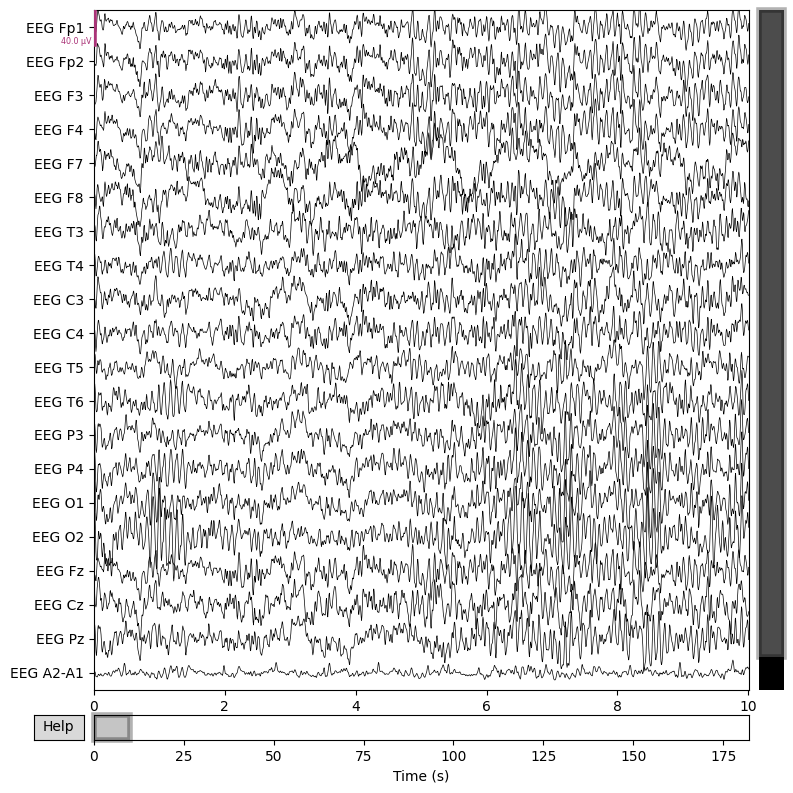

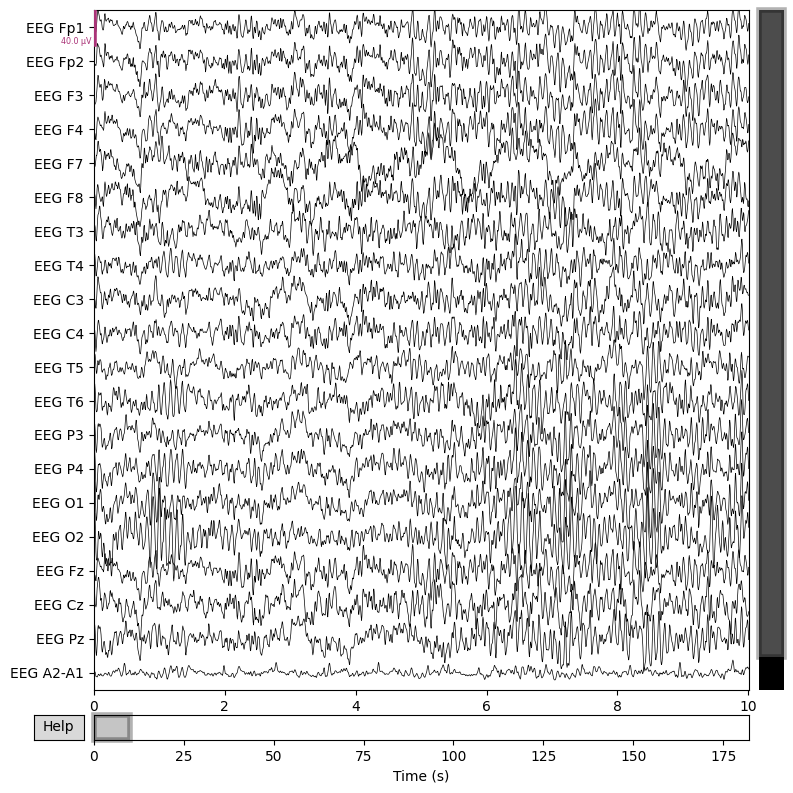

In [4]:
print(raws1[0].info)
plt.close()
raws1[0].plot()

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


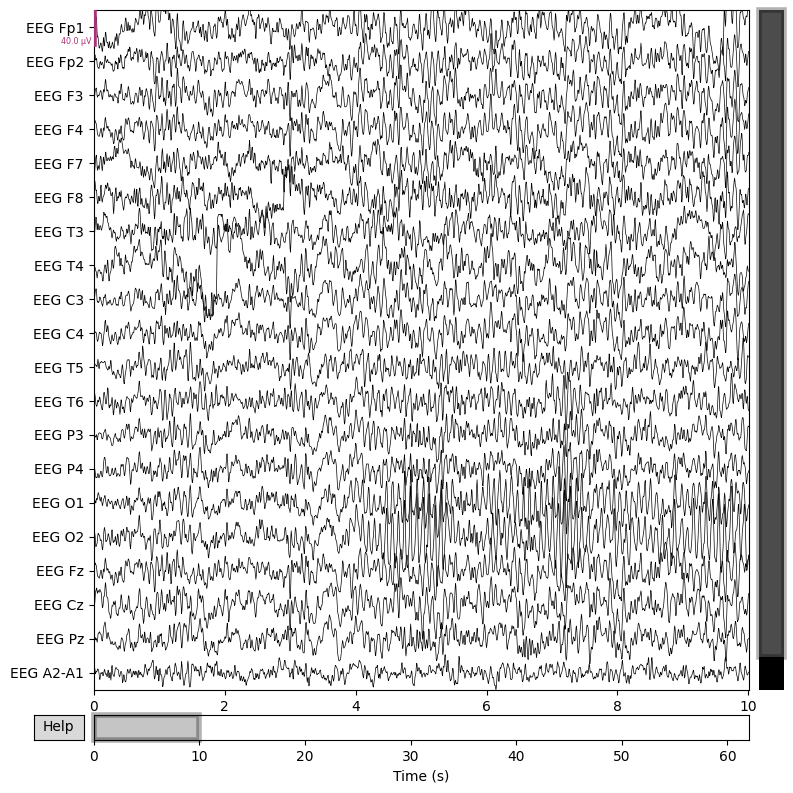

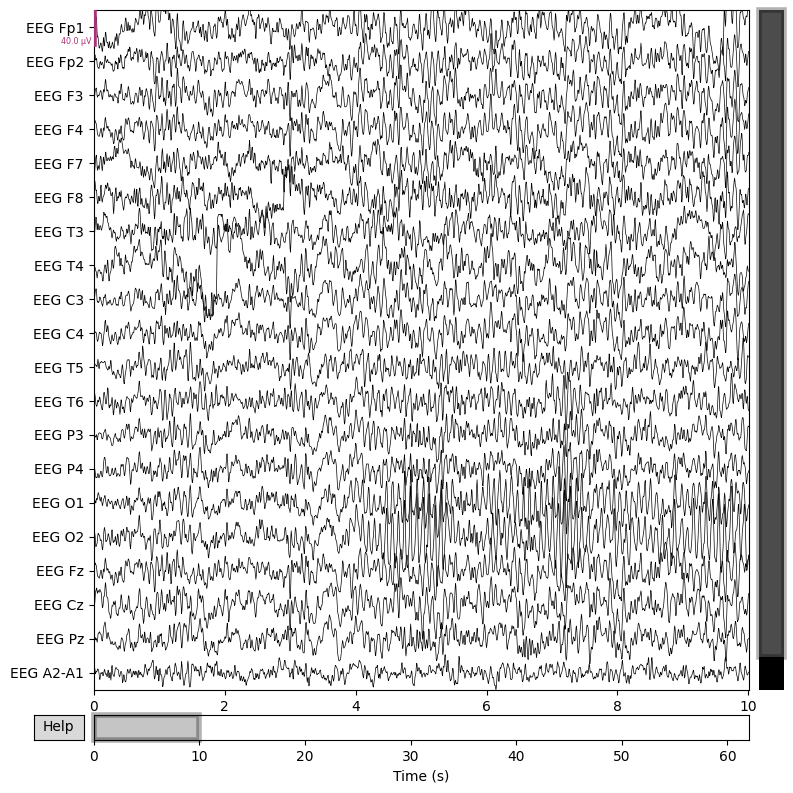

In [5]:
print(raws2[0].info)
plt.close()
raws2[0].plot()

#### **Calculate PSD :**

*rawPSDs1* and *rawPSDs2* contain the PSDs of raw files of class 1 and class 2 respectively

In [6]:
rawPSDs1 = [] # rest
for raw in raws1:
    rawPSD = raw.compute_psd(fmin=0, fmax=100, n_fft=2048)
    rawPSDs1.append(rawPSD)

rawPSDs2 = [] # task
for raw in raws2:
    rawPSD = raw.compute_psd(fmin=0, fmax=100, n_fft=2048)
    rawPSDs2.append(rawPSD)

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective wind

*Visualising PSD for class 1*

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>
Plotting power spectral density (dB=True).


/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_94325/2166248626.py:3: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  rawPSDs1[0].plot()
/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_94325/2166248626.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rawPSDs1[0].plot()
/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


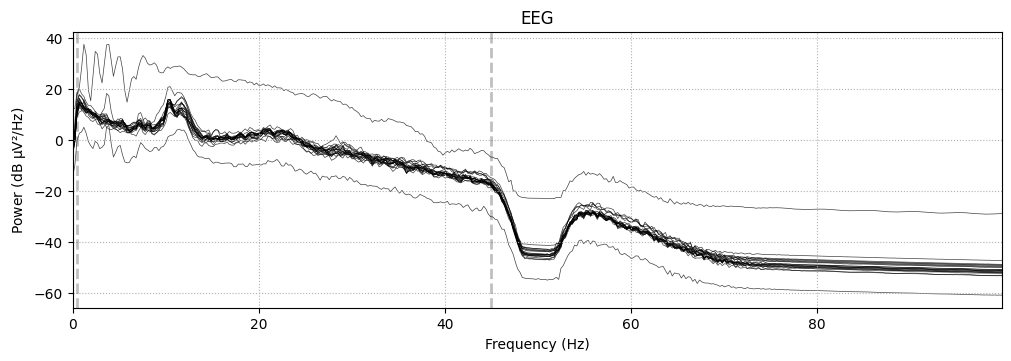

In [7]:
print(rawPSDs1[0].info)
plt.close()
rawPSDs1[0].plot()

*Visualising PSD for class 2*

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>
Plotting power spectral density (dB=True).


/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_94325/1840927663.py:3: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  rawPSDs2[0].plot()
/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_94325/1840927663.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rawPSDs2[0].plot()
/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


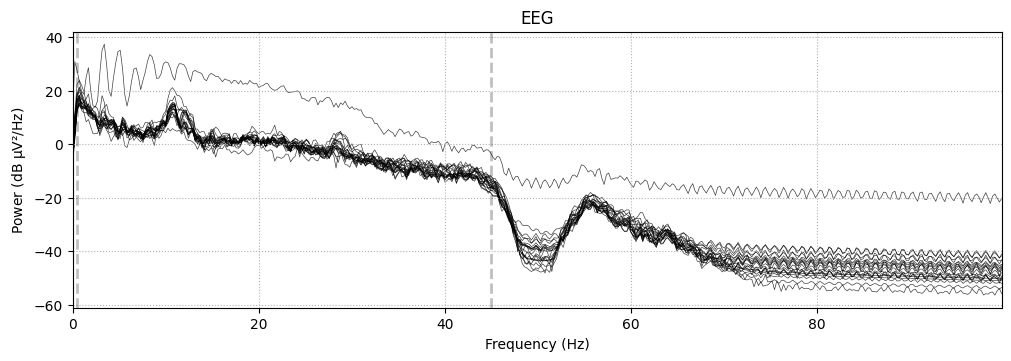

In [8]:
print(rawPSDs2[0].info)
plt.close()
rawPSDs2[0].plot()

*We observe high fluctuation in the data belonging to class 2*

#### **Defining Bands :**

In [9]:
bands = {'Delta': (1, 4), 'Theta': (4, 8), 'Alpha': (8, 12), 'Beta': (12, 30), 'Gamma': (30, 100)}

#### **Calculating bandwise PSD :**

In [10]:
PSDs1 = []
Freqs1 = []

for rawPSD in rawPSDs1:
    PSD, Freq = rawPSD.get_data(return_freqs=True)  
    PSDs1.append(PSD)
    Freqs1.append(Freq)

PSDs2 = []
Freqs2 = []

for rawPSD in rawPSDs2:
    PSD, Freq = rawPSD.get_data(return_freqs=True)  
    PSDs2.append(PSD)
    Freqs2.append(Freq)

*bandPSDs1* and *bandPSDs2* contain the bandwise PSDs of raw files of class 1 and class 2 respectively

In [11]:
bandPSDs1 = [] # rest
for i in range(len(PSDs1)):
    psds = PSDs1[i]
    freqs = Freqs1[i]
    band_psd = {band:[] for band in bands}

    for band, (fmin,fmax) in bands.items():
        idx = np.logical_and(freqs>=fmin,freqs<=fmax)
        band_psd[band] = np.mean(psds[:,idx],axis=1)

    bandPSDs1.append(band_psd)

bandPSDs2 = [] # task
for i in range(len(PSDs2)):
    psds = PSDs2[i]
    freqs = Freqs2[i]
    band_psd = {band:[] for band in bands}

    for band, (fmin,fmax) in bands.items():
        idx = np.logical_and(freqs>=fmin,freqs<=fmax)
        band_psd[band] = np.mean(psds[:,idx],axis=1)

    bandPSDs2.append(band_psd)

#### **Calculating the difference :**

In [12]:
DIFFs = []

for i in range(len(bandPSDs1)):
    DIFF = {band:[] for band in bands}
    for band in bands:
        diff = bandPSDs1[i][band] - bandPSDs2[i][band]
        DIFF[band].append(diff)
    DIFFs.append(DIFF)

**Visualising the difference :**

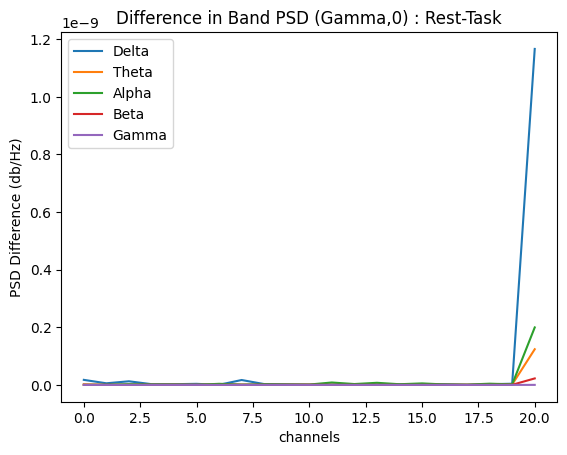

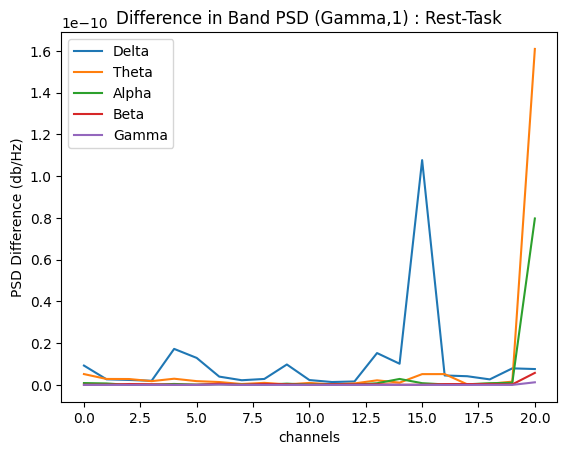

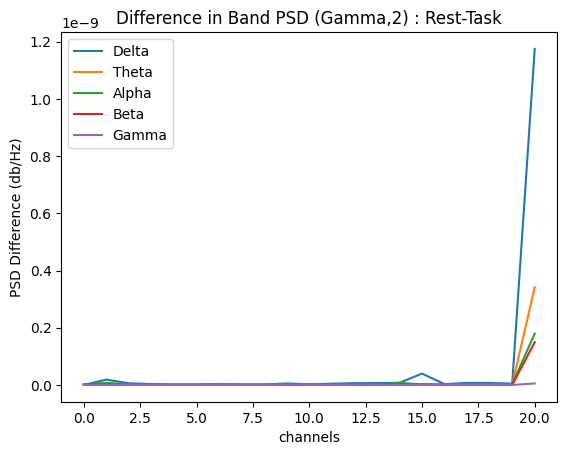

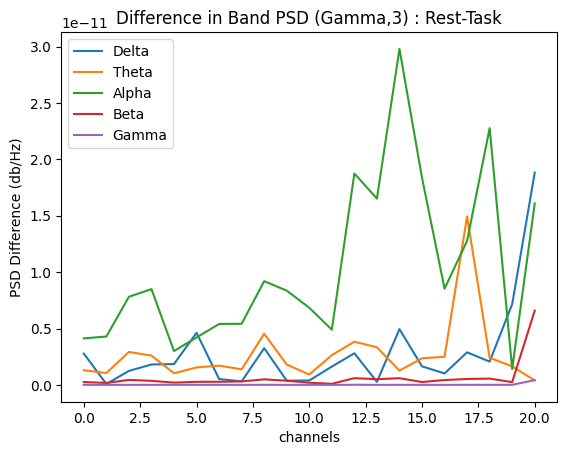

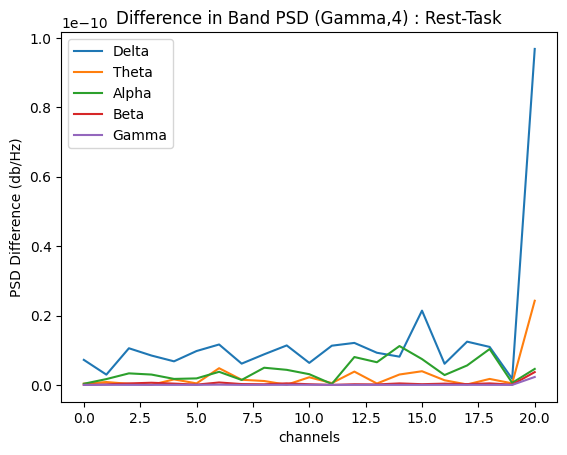

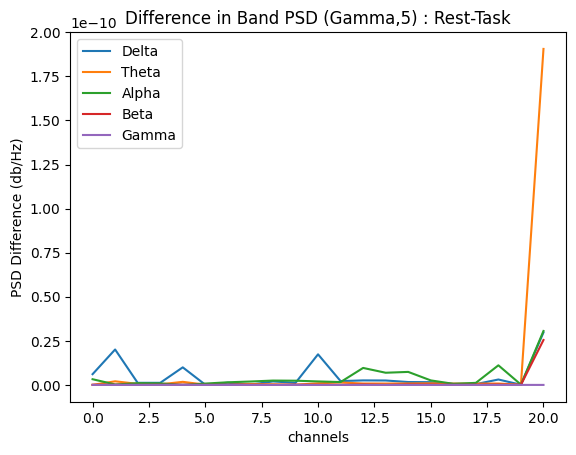

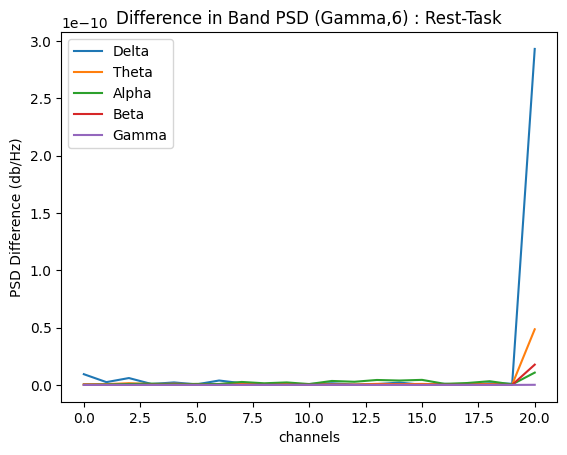

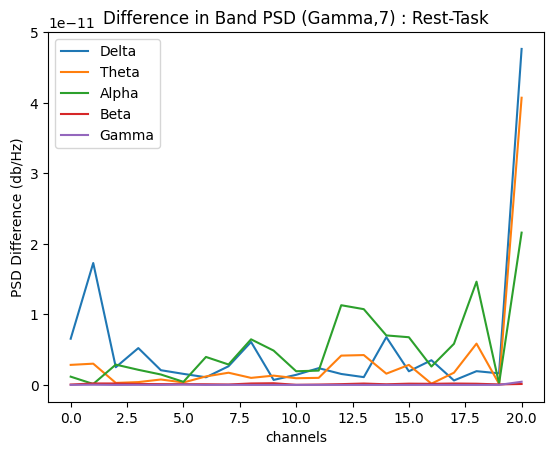

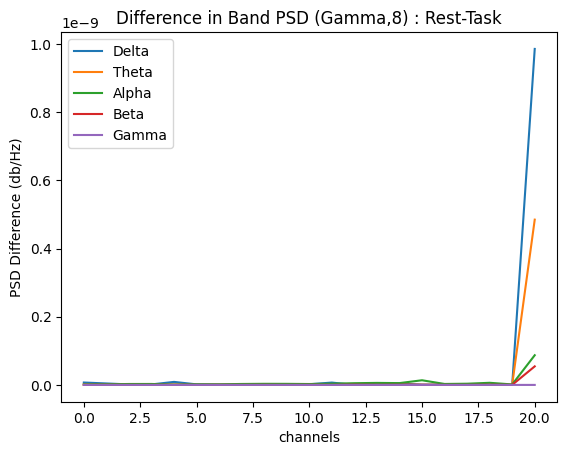

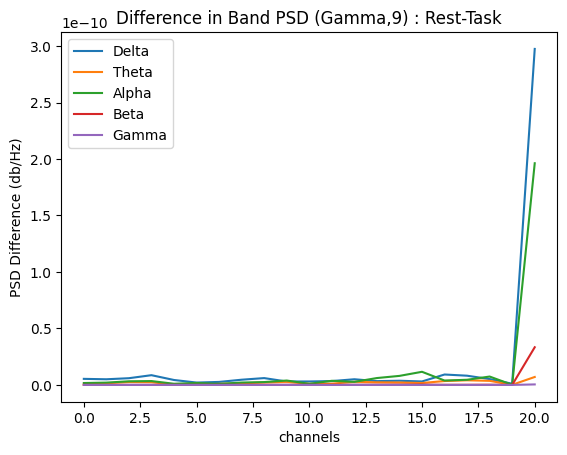

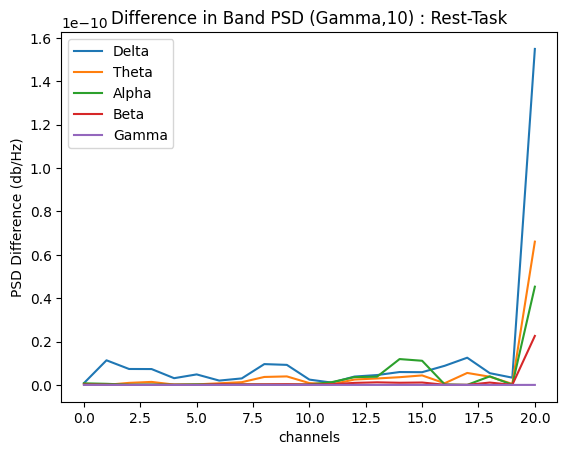

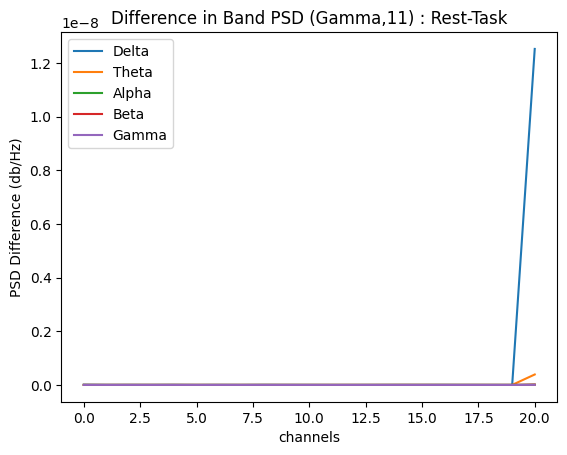

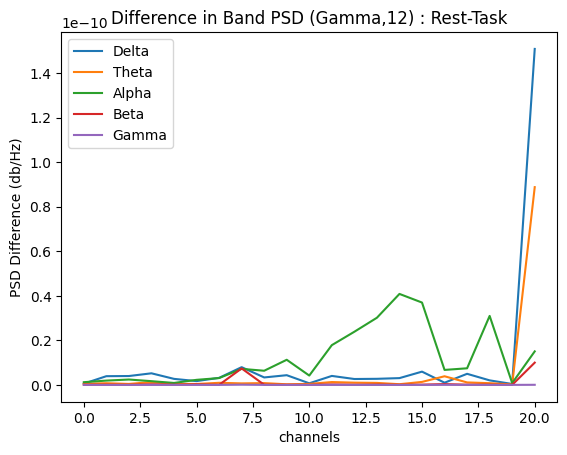

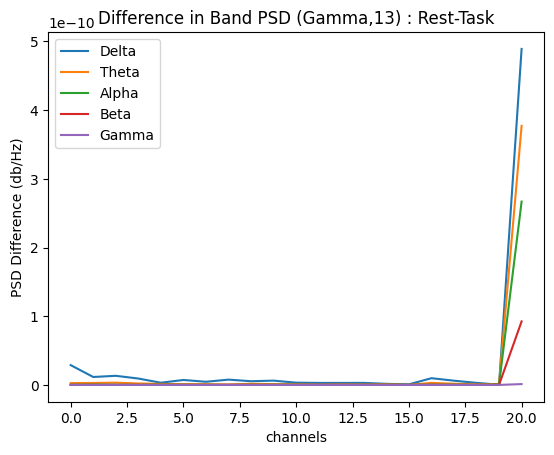

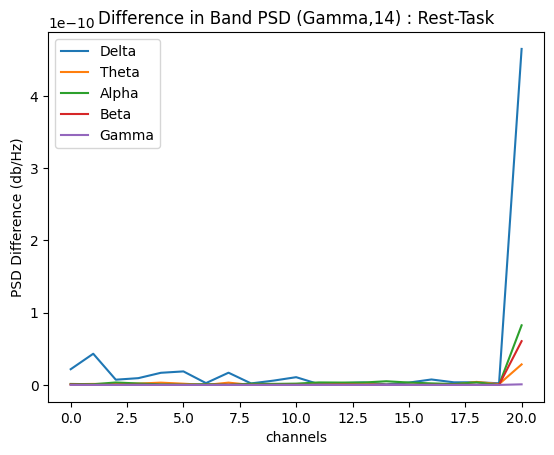

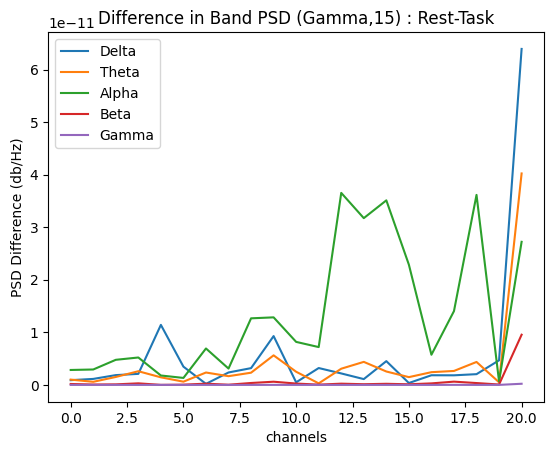

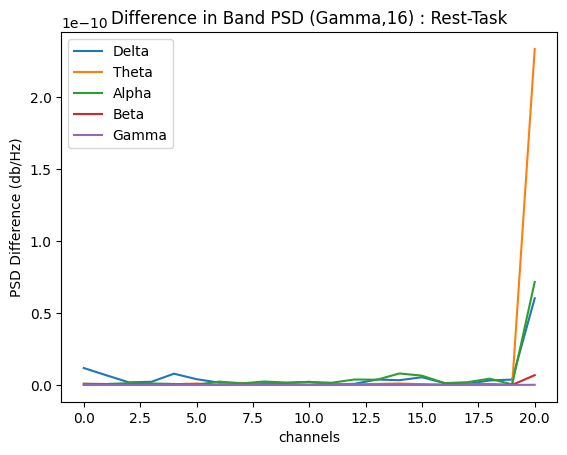

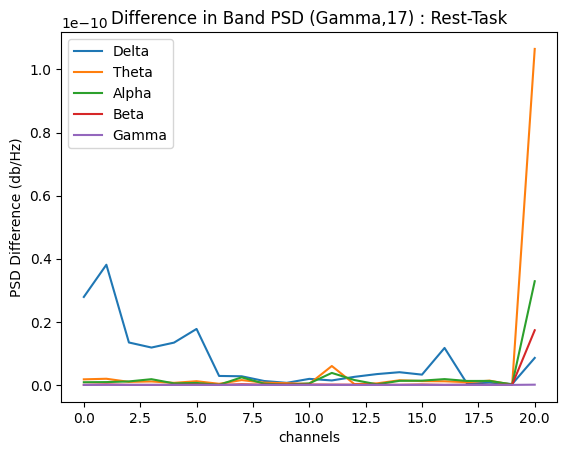

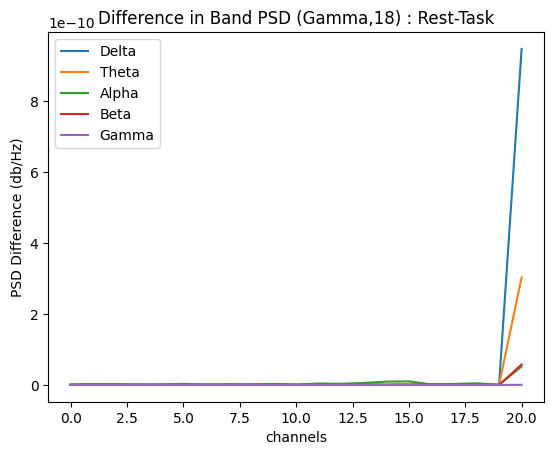

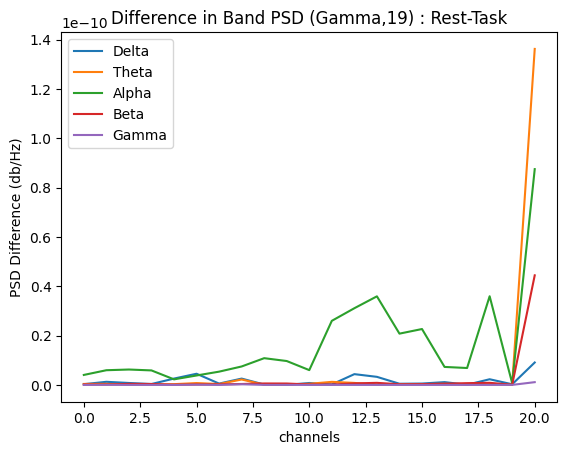

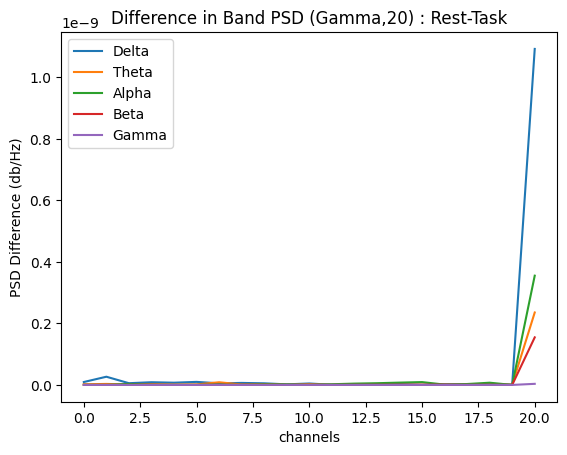

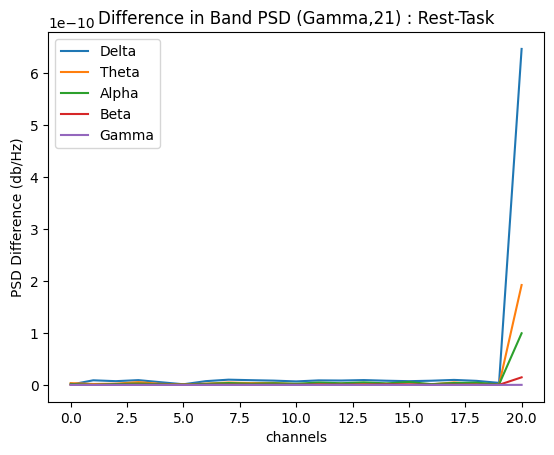

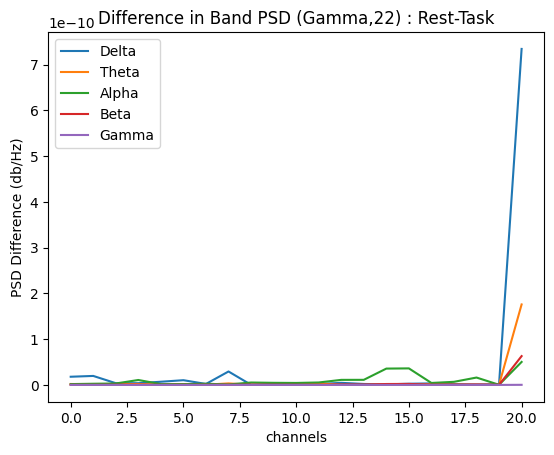

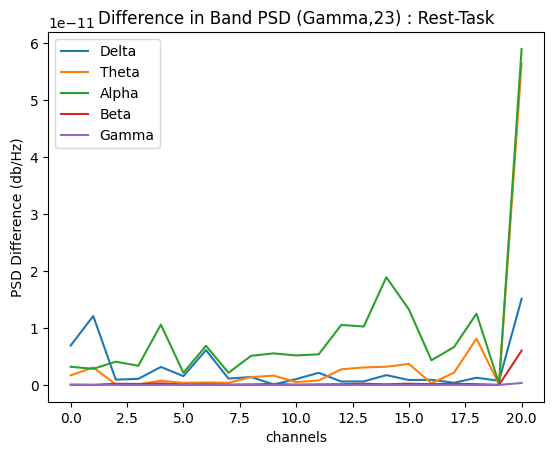

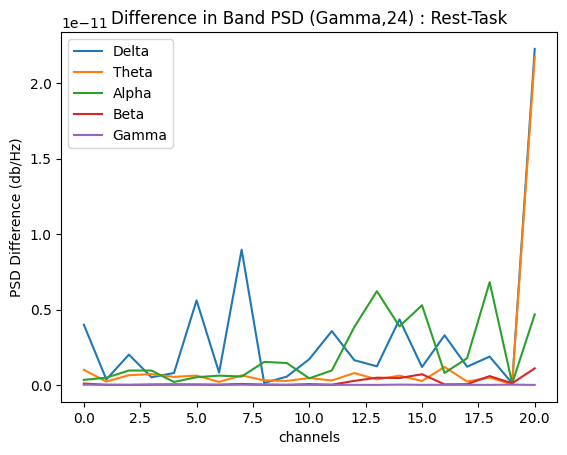

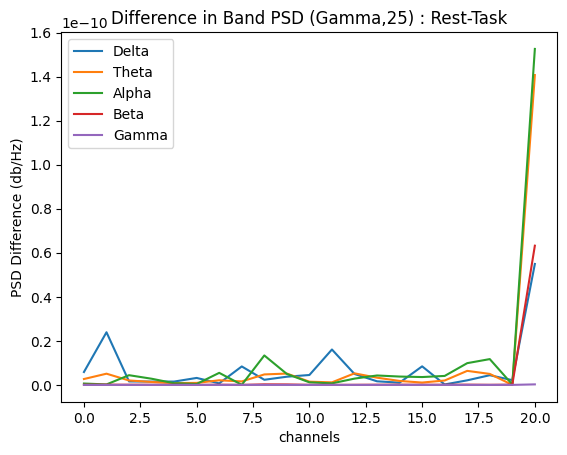

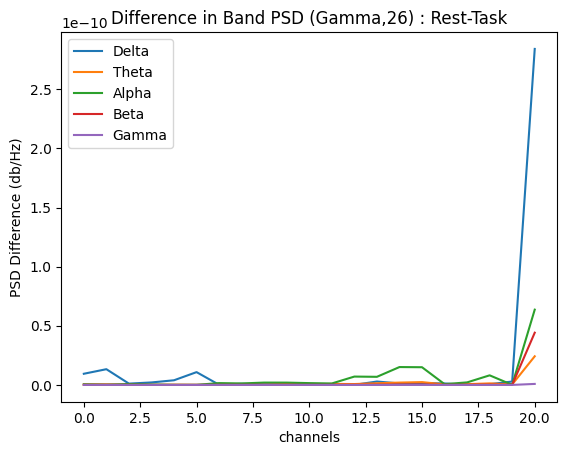

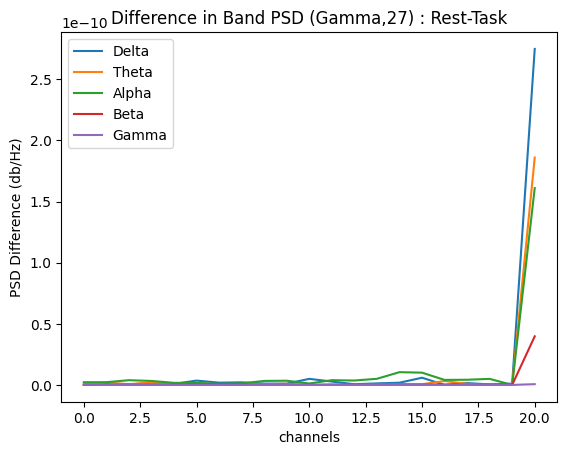

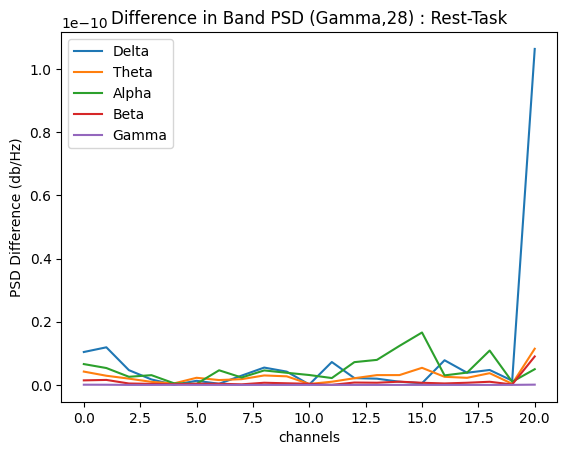

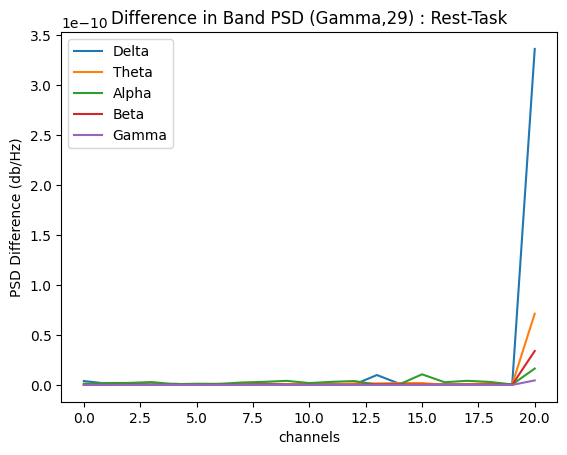

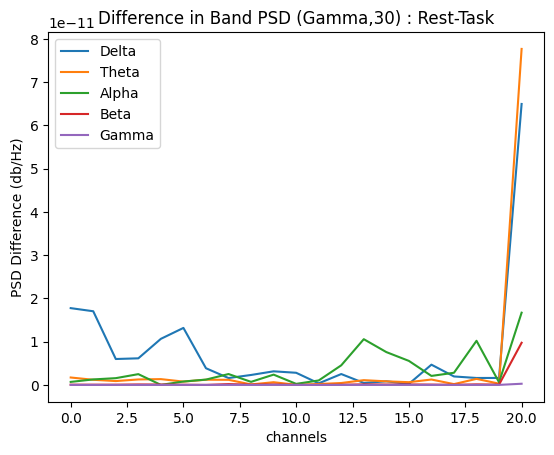

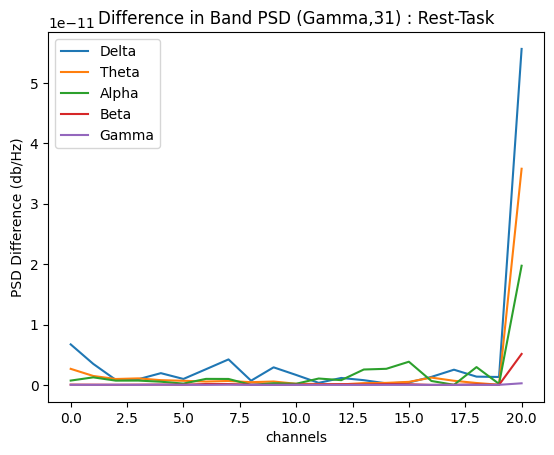

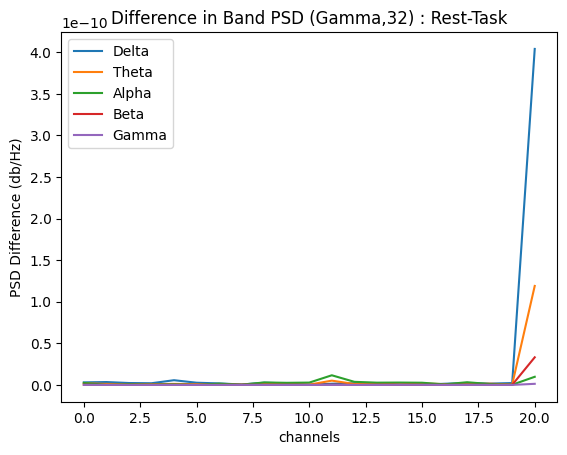

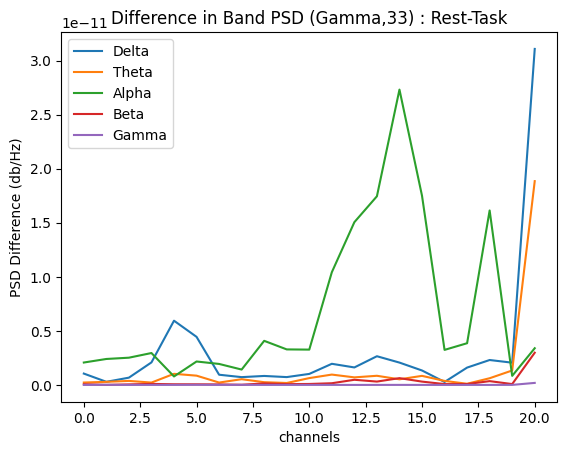

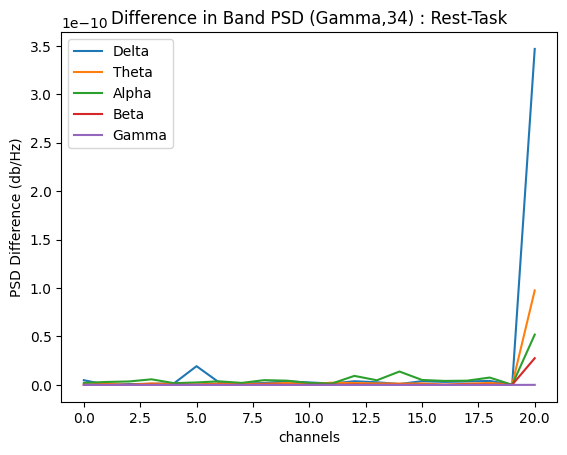

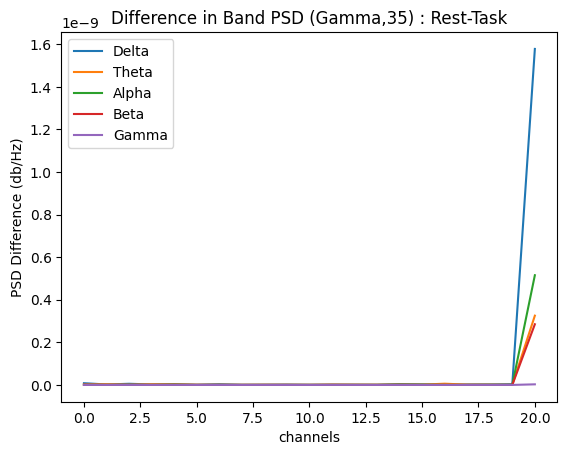

In [13]:
plt.close()
for j in range(len(DIFFs)):
    for i,band in enumerate(bands):
        plt.plot(np.abs(DIFFs[j][band][0]),label=f'{band}')
    plt.title(f'Difference in Band PSD ({band},{j}) : Rest-Task')
    plt.xlabel('channels')
    plt.ylabel('PSD Difference (db/Hz)')
    plt.legend()
    plt.show()
        


*We observe that **ALPHA, THETA and DELTA** bands are sensitive to change of state from rest to task*

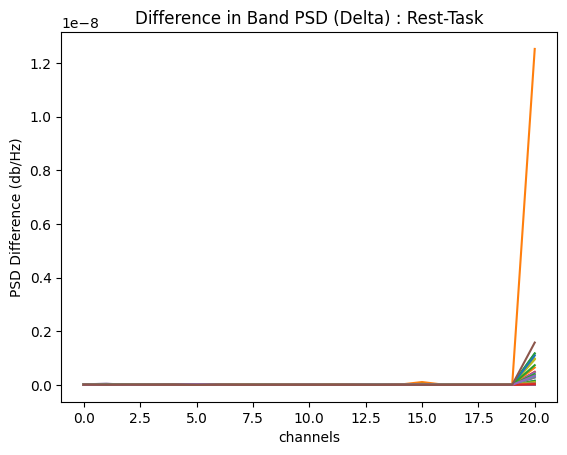

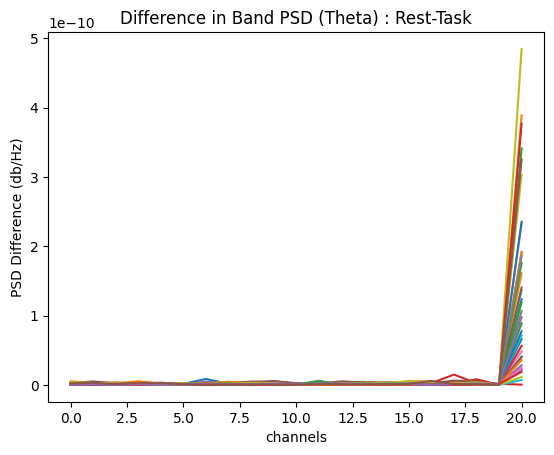

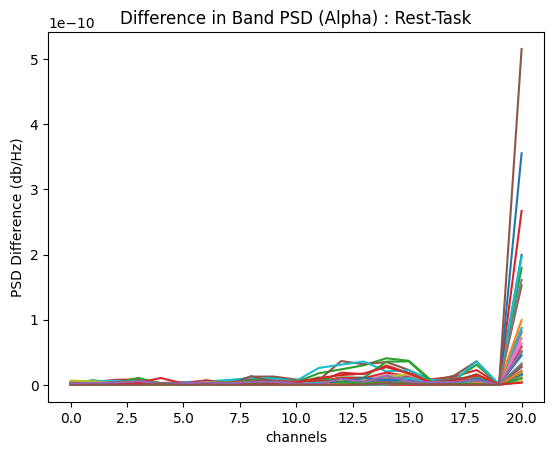

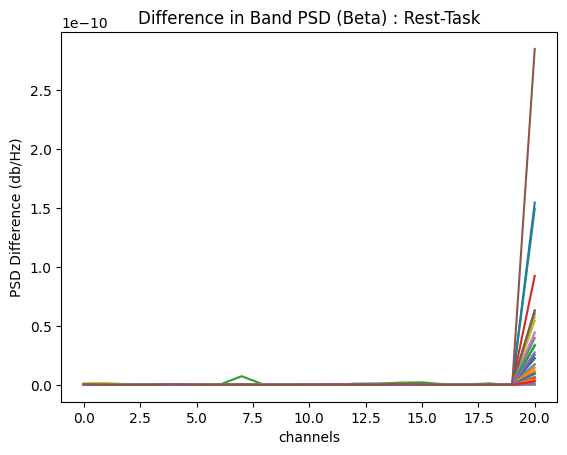

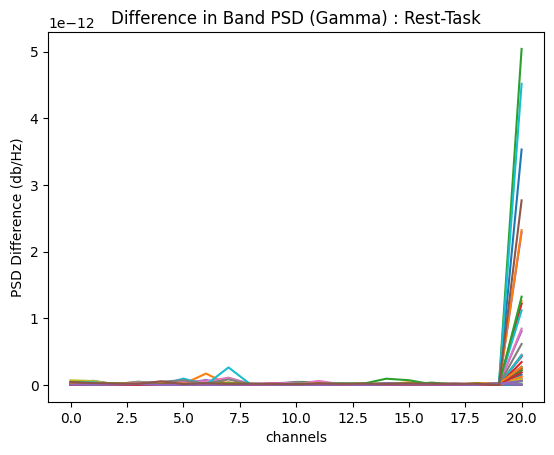

In [14]:
plt.close()
for band in bands:
    for i,j in enumerate(range(len(DIFFs))):
        plt.plot(np.abs(DIFFs[j][band][0]),label=f'{band}')
    plt.title(f'Difference in Band PSD ({band}) : Rest-Task')
    plt.xlabel('channels')
    plt.ylabel('PSD Difference (db/Hz)')
    plt.show()

*We observe that*
* **ALPHA** band signal fluctuation occurs in channels between ~7-20
* **THETA** band signal fluctuation occurs in channels between ~5-8 and ~15-20
* **DELTA** band signal fluctuation occurs in channel 15
* **GAMMA** band signal fluctuation occurs in channels between ~2-18


* 21st Channel shows high fluctuation

#### **Creating dataset for model training :**

In [15]:
data = []
labels = []

for i in PSDs1:
    data.append(i)
    labels.append(0)

for i in PSDs2:
    data.append(i)
    labels.append(1)

data = np.array(data)
labels = np.array(labels)

data.shape, labels.shape

((72, 21, 410), (72,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,shuffle=True)

# Reshape data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

#### **Implementing EEGNET :**

**Defining model :**

In [17]:
def EEGNet(nb_classes, Chans = 64, Samples = 128, dropoutRate = 0.5, kernLength = 64, F1 = 8, D = 2, F2 = 16, norm_rate = 0.25):
    model = Sequential()
    model.add(Conv2D(F1, (1, kernLength), padding = 'same', input_shape = (Chans, Samples, 1)))
    model.add(BatchNormalization())
    model.add(DepthwiseConv2D((Chans, 1), padding = 'valid', depth_multiplier = D))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(AveragePooling2D((1, 4)))
    model.add(Dropout(dropoutRate))
    model.add(SeparableConv2D(F2, (1, 16), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(AveragePooling2D((1, 8)))
    model.add(Dropout(dropoutRate))
    model.add(Flatten())
    model.add(Dense(nb_classes, activation = 'softmax'))
    return model

**Compiling model :**

In [18]:
model_EEGNET = EEGNet(nb_classes=2, Chans=X_train.shape[1], Samples=410)
model_EEGNET.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Training model :**

In [19]:
model_EEGNET.fit(X_train, y_train, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5590 - loss: 0.6928 - val_accuracy: 0.4167 - val_loss: 0.6943
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5023 - loss: 0.6940 - val_accuracy: 0.4167 - val_loss: 0.6952
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6868 - val_accuracy: 0.4167 - val_loss: 0.6958
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5936 - loss: 0.6861 - val_accuracy: 0.4167 - val_loss: 0.6963
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5701 - loss: 0.6913 - val_accuracy: 0.4167 - val_loss: 0.6970
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6359 - loss: 0.6864 - val_accuracy: 0.4167 - val_loss: 0.6978
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6405 - loss: 0.6873 - val_accuracy: 0.4167 - val_loss: 0.6986
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6326 - loss: 0.6832 - val_accuracy: 0.4167 - val_loss:

**Evaluating models :**

In [20]:
model_EEGNET.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3333 - loss: 0.7693


[0.7693188786506653, 0.3333333432674408]

In [21]:
y_hat = model_EEGNET.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)

print(y_hat == y_test,'\n')

acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
rec = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
con = confusion_matrix(y_test, y_hat)

print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1: {f1}\nConfusion Matrix: \n{con}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[False  True False False False  True False False False  True  True False
 False  True False] 

Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1: 0.5
Confusion Matrix: 
[[ 0 10]
 [ 0  5]]


#### **Implementing TSCeption :**

**Defining Model Builders :**

In [22]:
def TSCeptionBlock(input_tensor, filters, kernel_sizes):
    convs = []
    for kernel_size in kernel_sizes:
        conv = layers.Conv2D(filters=filters, kernel_size=(1, kernel_size), padding='same', activation='relu')(input_tensor)
        conv = layers.BatchNormalization()(conv)
        convs.append(conv)
    output = layers.Concatenate(axis=-1)(convs)
    return output

def TSCeptionModel(input_shape, num_classes, num_blocks=3, filters=16, kernel_sizes=[3, 5, 7]):
    input_layer = Input(shape=input_shape)
    
    x = input_layer
    for _ in range(num_blocks):
        x = TSCeptionBlock(x, filters, kernel_sizes)
        x = layers.MaxPooling2D(pool_size=(1, 2))(x)
        filters *= 2

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

In [23]:
input_shape = (21, 410, 1)  #(channels, sample, 1)
num_classes = 2

**Compiling Model :**

In [24]:
model_TSC = TSCeptionModel(input_shape, num_classes)
model_TSC.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_TSC.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 21, 410,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 21, 410,   │         64 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 21, 410,   │         96 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 21, 410,   │        128 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 410,   │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 410,   │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 410,   │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 21, 410,   │          0 │ batch_normalizat… │
│ (Concatenate)       │ 48)               │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 21, 205,   │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 21, 205,   │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 21, 205,   │      7,712 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 21, 205,   │     10,784 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 205,   │        128 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 205,   │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 205,   │        128 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 21, 205,   │          0 │ batch_normalizat… │
│ (Concatenate)       │ 96)               │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat

 Total params: 26,438,402 (100.85 MB)

 Trainable params: 26,437,730 (100.85 MB)

 Non-trainable params: 672 (2.62 KB)

**Training Model :**

In [25]:
history = model_TSC.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 571ms/step - accuracy: 0.5727 - loss: 0.6927 - val_accuracy: 0.5833 - val_loss: 0.6900
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step - accuracy: 0.5030 - loss: 1.8140 - val_accuracy: 0.5833 - val_loss: 0.7191
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - accuracy: 0.5683 - loss: 0.8496 - val_accuracy: 0.5833 - val_loss: 0.6814
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.6484 - loss: 0.7234 - val_accuracy: 0.4167 - val_loss: 0.7637
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - accuracy: 0.5282 - loss: 0.8436 - val_accuracy: 0.4167 - val_loss: 0.8294
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - accuracy: 0.5178 - loss: 0.7637 - val_accuracy: 0.4167 - val_loss: 0.7601
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.4169 - loss: 0.9282 - val_accuracy: 0.4167 - val_loss: 0.6990
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 0.5431 - loss: 0.7077 - val_accuracy: 0.5833 - val_loss:

**Evaluating Model :**

In [26]:
model_TSC.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3333 - loss: 1.9562


[1.956173300743103, 0.3333333432674408]

In [27]:
y_hat = model_TSC.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)

print(y_hat == y_test,'\n')

acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
rec = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
con = confusion_matrix(y_test, y_hat)

print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1: {f1}\nConfusion Matrix: \n{con}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
[False  True False False False  True False False False  True  True False
 False  True False] 

Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1: 0.5
Confusion Matrix: 
[[ 0 10]
 [ 0  5]]


# Experimentation :

#### **Creating Processed Dataset for classification :**

In [28]:
dataset = []
for i in range(len(bandPSDs1)):
    row = []
    for band in bands:
        for j in bandPSDs1[i][band]:
            row.append(j)
    row.append(0)
    dataset.append(row)

for i in range(len(bandPSDs2)):
    row = []
    for band in bands:
        for j in bandPSDs2[i][band]:
            row.append(j)
    row.append(1)
    dataset.append(row)

In [29]:
dataset = np.array(dataset)
dataset.shape 

(72, 106)

**Spliting dataset into training and testing batches :**

In [30]:
X = dataset[:,:-1]
Y = dataset[:,-1].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### **Implementing Convolution model :**

**Defining model :**

In [31]:
model = Sequential()
model.add(Reshape((21,5,1), input_shape=(105,)))
model.add(Conv2D(16, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(4, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

/Users/rnks/anaconda3/envs/iitR/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compiling Model :**

In [32]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 21, 5, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 21, 5, 16)      │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 21, 5, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 10, 2, 16)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 2, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 2, 4)       │         1,604 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 10, 2, 4)       │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 1, 4)        │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 1, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,142 (8.37 KB)

 Trainable params: 2,102 (8.21 KB)

 Non-trainable params: 40 (160.00 B)

In [33]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=250, validation_split=0.2, shuffle=True)

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5118 - loss: 0.6928 - val_accuracy: 0.4167 - val_loss: 0.6936
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5074 - loss: 0.6894 - val_accuracy: 0.4167 - val_loss: 0.6943
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6736 - loss: 0.6856 - val_accuracy: 0.4167 - val_loss: 0.6948
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5519 - loss: 0.6933 - val_accuracy: 0.4167 - val_loss: 0.6952
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5431 - loss: 0.6847 - val_accuracy: 0.4167 - val_loss: 0.6958
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5535 - loss: 0.6900 - val_accuracy: 0.4167 - val_loss: 0.6962
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5326 - loss: 0.6960 - val_accuracy: 0.4167 - val_loss: 0.6964
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5370 - loss: 0.6944 - val_accuracy: 0.4167 - val_loss:

**Analysing training vs validation curves for accuacy and loss :**

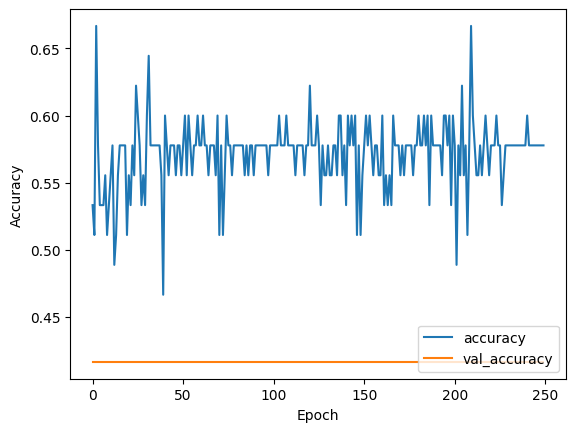

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

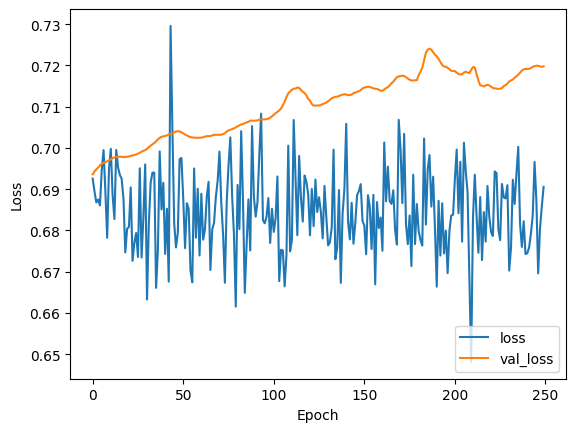

In [35]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

**Evaluating model :**

In [36]:
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3333 - loss: 0.7395


[0.7394503355026245, 0.3333333432674408]

In [37]:
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)

print(y_hat == Y_test,'\n')

acc = accuracy_score(Y_test, y_hat)
prec = precision_score(Y_test, y_hat)
rec = recall_score(Y_test, y_hat)
f1 = f1_score(Y_test, y_hat)
con = confusion_matrix(Y_test, y_hat)

print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1: {f1}\nConfusion Matrix: \n{con}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[False  True False False False  True False False False  True  True False
 False  True False] 

Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1: 0.5
Confusion Matrix: 
[[ 0 10]
 [ 0  5]]


# RESULTS

1. With Respect to Data

    * Upon analysing the PSD trends of two classes, it is observed that the PSD curve of class 2 (task) is noisy.

    * Upon analysing the bandwise PSD and comparing bandwise PSDs of two classes, we observe that the ALPHA, THETA and DELTA bands fluctuate more than other bands.

    * The above inference brings up to conclusion that these bands are sensitive to change of state (0 -> 1).

    * Analysing the visualisations of difference between the bandwise PSDs we observe lot of fluctuations in data of 21st channel.

2. With Respect to Models Trained

    * The EEGNET model trains well in short span of time with training accuracy up to 65% and validation accuracy of about 45%.

    * The TSCeption model also performs similarly.

    * The much simplar CNN used gives output simliar to the previous models.

    * both the models are observed to have given the same scores,
    ```python
    accuracy_score = 0.333333
    precision_score = 0.333333
    f1_score = 0.5
    confusion_matrix = 
                        [[0 , 10],
                        [0 , 5 ]]
    ```
3. With Respect to Model Evaluation

    * Upon close inspection of model traing history, we observe that the models are overfitting and hence doesnt generalise properly.

    * This can be inferred by looking at training_acc >> validation_acc and testing_acc << groungTruth.

    * Regularisation used did indeed reduce bit of overfitting, but overfitting does persist. Thus the overfitting can be removed only by increasing number of records in data.

4. With Respect to Experimentation

    * Upon exploring cleaning and reordering the PSD for eeg signal, the processed dataset consists of each record of shape (21,410,1).

    * A simple CNN trained on this dataset performs as good as models discussed earliercwith same sklearn.metrics